In [1]:
import numpy as np
import pandas as pd

## Load Dataset

In [2]:
train = pd.read_csv("data/train.csv")

print(train.shape)
train.head()

(2000, 2)


,filename,target
0,0.jpg,0
1,1.jpg,0
2,2.jpg,1
3,3.jpg,1
4,4.jpg,1


### Load Image

In [3]:
from scipy.ndimage import imread

def load_images(filenames):
    images = []

    for filename in filenames:
        image = imread(filename)
        images.append(image)

    images = np.array(images)

    return images

In [4]:
filenames = "data/train/" + train["filename"]

X_train = load_images(filenames)
X_train.shape

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  import sys


(2000,)

In [5]:
y_train = train["target"].values

print(y_train.shape)
y_train[0:10]

(2000,)


array([0, 0, 1, 1, 1, 1, 0, 0, 1, 0], dtype=int64)

### Visualize

[0 0 1 1 1 1 0 0 1 0]


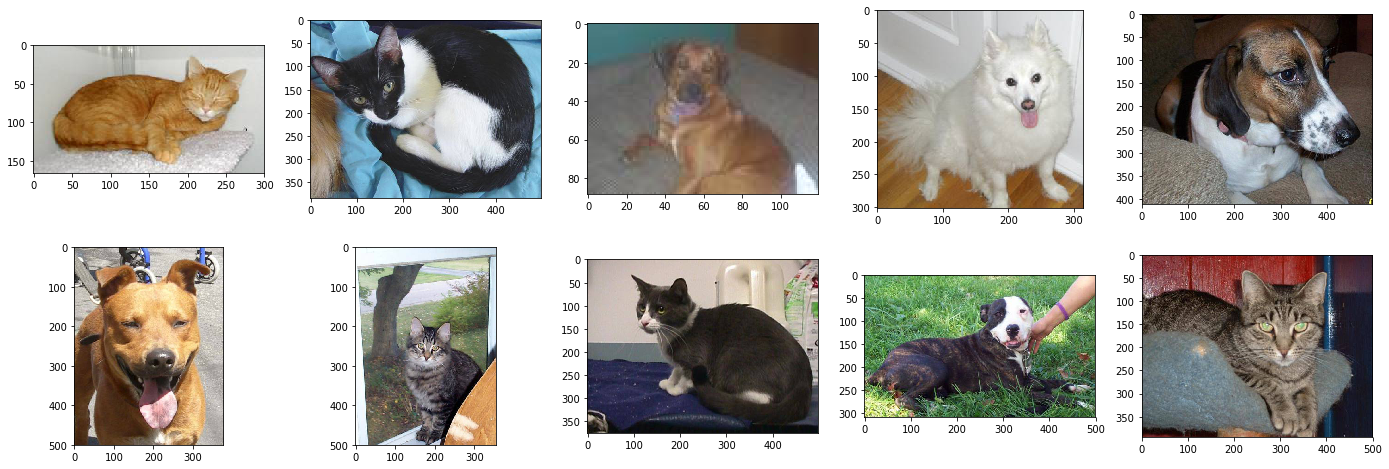

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

figure, axes = plt.subplots(nrows=2, ncols=5)
figure.set_size_inches(24, 8)

print(y_train[0:10])

axes[0][0].imshow(X_train[0])
axes[0][1].imshow(X_train[1])
axes[0][2].imshow(X_train[2])
axes[0][3].imshow(X_train[3])
axes[0][4].imshow(X_train[4])
axes[1][0].imshow(X_train[5])
axes[1][1].imshow(X_train[6])
axes[1][2].imshow(X_train[7])
axes[1][3].imshow(X_train[8])
axes[1][4].imshow(X_train[9])

## Preprocessing

In [27]:
# Write your code here!
# keras에 쉽게할 수 있는 기능이 있다.

from keras.preprocessing.image import ImageDataGenerator
generator = ImageDataGenerator(
    featurewise_center=False, 
    samplewise_center=False, 
    featurewise_std_normalization=False, 
    samplewise_std_normalization=False, 
    zca_whitening=False, 
    zca_epsilon=1e-06, 
    rotation_range=0.0, 
    width_shift_range=0.0, 
    height_shift_range=0.0, 
    brightness_range=None, 
    shear_range=0.0, 
    zoom_range=(0.7,1.3),
    channel_shift_range=0.0, 
    fill_mode='nearest',
    cval=0.0, 
    horizontal_flip=False, 
    vertical_flip=False, 
    rescale=None, 
    preprocessing_function=None, 
    data_format=None, 
    validation_split=0.0) # 위아래반전은 사진속에서 많이 쓰지는 않는다.
# 특히 6 이나 9 같이 돌렸을 때 같아지는거는 약간 좀 고려해서

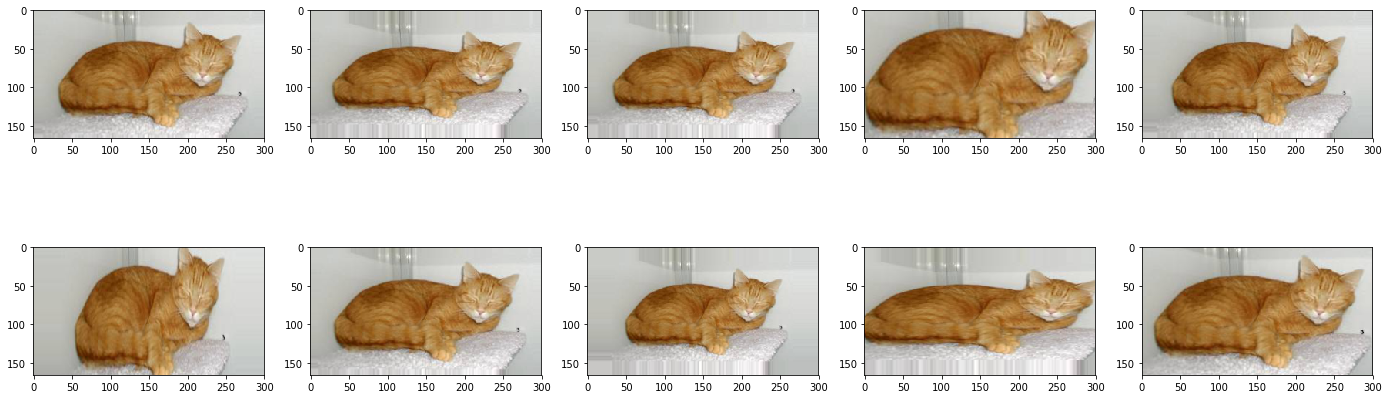

In [28]:
original_image = X_train[0]

transformed_images = [generator.random_transform(original_image) for _ in range(10)]

figure , axes = plt.subplots(nrows=2, ncols=5)
figure.set_size_inches(24,8)
axes[0][0].imshow(transformed_images[0])
axes[0][1].imshow(transformed_images[1])
axes[0][2].imshow(transformed_images[2])
axes[0][3].imshow(transformed_images[3])
axes[0][4].imshow(transformed_images[4])
axes[1][0].imshow(transformed_images[5])
axes[1][1].imshow(transformed_images[6])
axes[1][2].imshow(transformed_images[7])
axes[1][3].imshow(transformed_images[8])
axes[1][4].imshow(transformed_images[9])